## This script contains the following:

### 1. Importing libraries and data
### 2. Subsetting, wrangling, and cleaning time-series data
### 3. Time series analysis: decomposition
### 4. Testing for stationarity
### 5. Stationarizing the Data

### 1. Importing libraries and data

In [2]:
# Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [9]:
# Define path

path=r'/Users/sofiakazeko/Jupiter/Achievement 6 - University Rankings'

In [10]:
# Import data

df_cwur = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_cwur_cleaned.csv'), index_col = False)

In [12]:
df_cwur.head()

,Unnamed: 0,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,0,1,Harvard University,USA,1,7,9,1,1,1,1,1.0,5,100.00,2012
1,1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,2.0,1,91.67,2012
2,2,3,Stanford University,USA,3,17,11,5,4,2,2,4.0,15,89.50,2012
3,3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,13.0,50,86.17,2012
4,4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,24.5,18,85.21,2012


In [13]:
df_cwur.shape

(2200, 15)

# 2. Subsetting, wrangling, and cleaning time-series data

In [42]:
df_cwur['year'] = pd.to_datetime(df_cwur['year'], format='%Y')

In [43]:
df_cwur.shape

(2200, 15)

In [45]:
df_cwur.columns

Index(['Unnamed: 0', 'world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [46]:
# Set the 'date' column as the index
df_cwur.set_index('year', inplace=True)

In [47]:
df_cwur.head()

,Unnamed: 0,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
year,,,,,,,,,,,,,,
2012-01-01,0,1,Harvard University,USA,1,7,9,1,1,1,1,1.0,5,100.00
2012-01-01,1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,2.0,1,91.67
2012-01-01,2,3,Stanford University,USA,3,17,11,5,4,2,2,4.0,15,89.50
2012-01-01,3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,13.0,50,86.17
2012-01-01,4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,24.5,18,85.21


In [48]:
# Resample the data frequency, summing the number of publications
df2 = df_cwur['publications'].resample('M').sum()

In [49]:
df2

year
2012-01-31      5502
2012-02-29         0
2012-03-31         0
2012-04-30         0
2012-05-31         0
2012-06-30         0
2012-07-31         0
2012-08-31         0
2012-09-30         0
2012-10-31         0
2012-11-30         0
2012-12-31         0
2013-01-31      5467
2013-02-28         0
2013-03-31         0
2013-04-30         0
2013-05-31         0
2013-06-30         0
2013-07-31         0
2013-08-31         0
2013-09-30         0
2013-10-31         0
2013-11-30         0
2013-12-31         0
2014-01-31    500411
2014-02-28         0
2014-03-31         0
2014-04-30         0
2014-05-31         0
2014-06-30         0
2014-07-31         0
2014-08-31         0
2014-09-30         0
2014-10-31         0
2014-11-30         0
2014-12-31         0
2015-01-31    500419
Freq: ME, Name: publications, dtype: int64

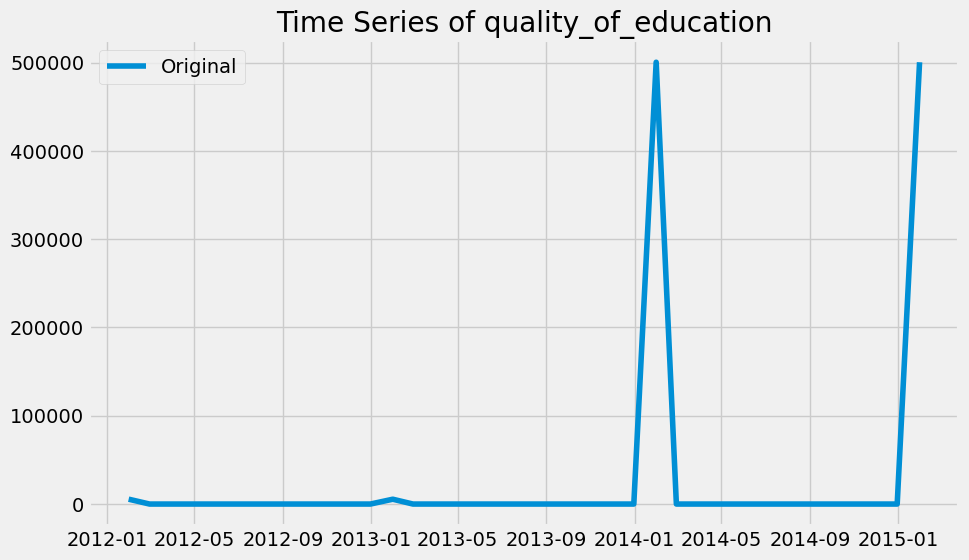

In [50]:
# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(df2, label='Original')
plt.title('Time Series of quality_of_education')
plt.legend()
plt.show()


# 3. Time series analysis: decomposition

In [51]:
# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(df2, model='additive', period=1)


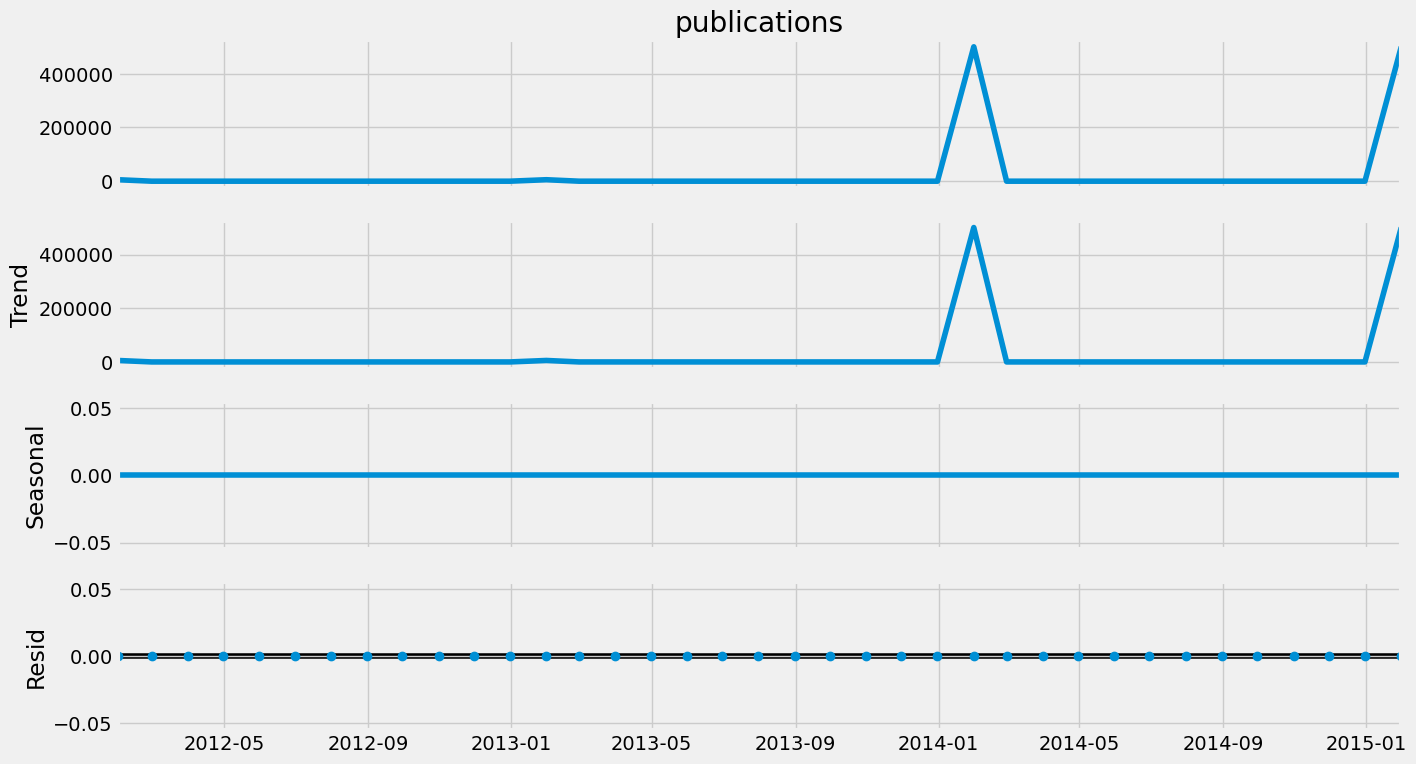

In [52]:
# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()


Since the data was resampled there is no clear trend. The initial data was yearly, therefore the seasonal component doesn't reveal much, remaining close to zero or constant. 

### 4. Testing for stationarity

In [53]:
# Function to perform and display the Dickey-Fuller test results
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

# Apply the test using the function on the time series
dickey_fuller(df2)


Dickey-Fuller Stationarity test:
Test Statistic                 -4.432107
p-value                         0.000260
Number of Lags Used             0.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


p-value = 0.00026 < 0.05

and Test Statistic < critical values

=> data is stationary

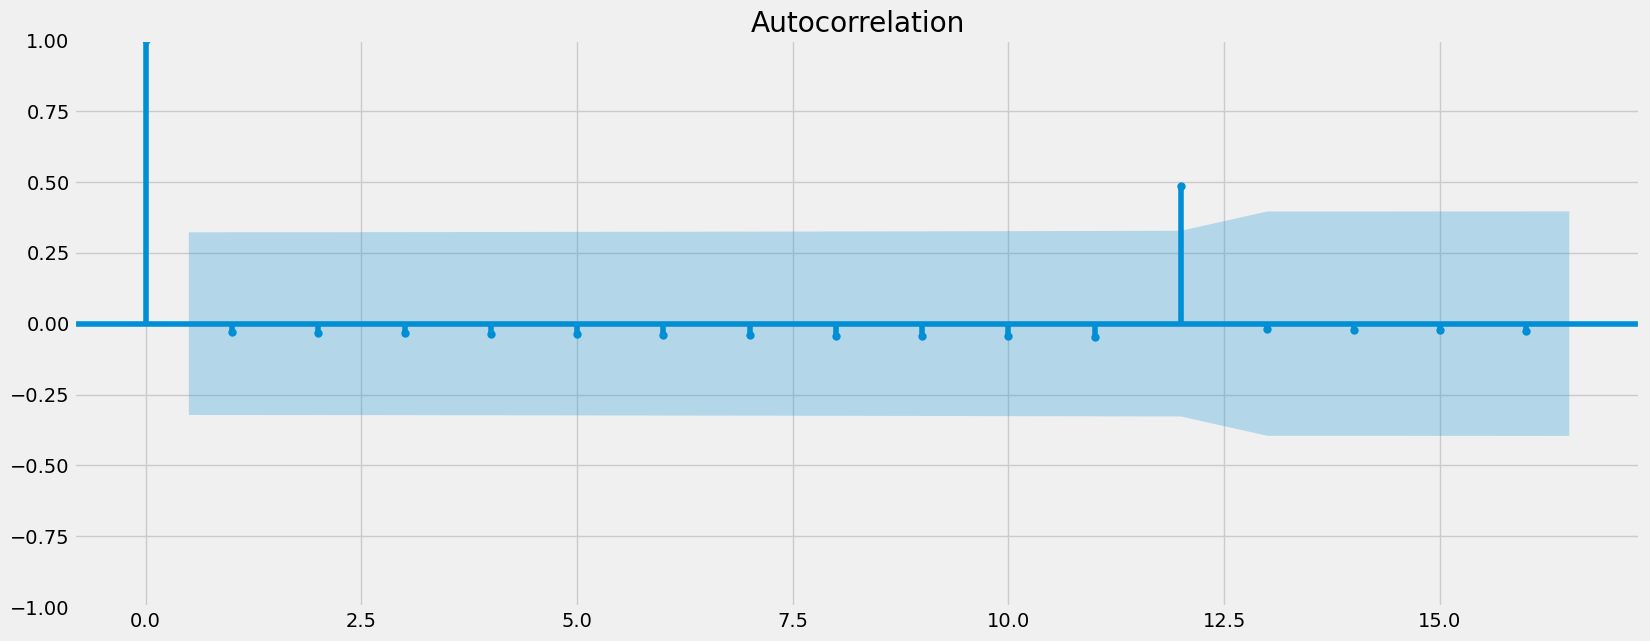

In [56]:
# Importing autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df2)
plt.show()